In [102]:
#Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
#load data, change directory to your corresponding directories
#tag = pd.read_csv("C:/Users/cos00/Desktop/Nuclear/APAN5900/Tag Data JG.csv")
tag = pd.read_csv('~/Desktop/APAN5900/Tag Data JG Final.csv')

In [27]:
np.shape(tag) #dimension

(473316, 61)

In [28]:
tag.describe()  #summary of tag data

,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,P1:Fc70302.AOT,P1:FC70309,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
count,1278.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,...,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000,473316.000000
mean,4.541045,42697.564835,90.883294,37650.296329,13799.355613,6993.087183,6812.549860,77269.628019,49.759005,50194.459860,...,180.077235,184.628563,187.600284,187.648887,186.447173,188.794627,187.851569,187.065414,101.841228,95.946771
std,3.072943,10409.469514,108.868719,17541.992210,4844.480903,1610.017478,1595.493626,30163.198765,15.858300,12519.459197,...,12.794251,10.974918,11.157245,10.579637,9.841102,10.846967,10.506045,10.620619,8.422225,9.470458
min,0.709000,0.000000,0.500005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000092,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,70.590424,32.000000
25%,3.380000,41776.507750,1.000000,28826.140000,9943.868400,6968.703975,6924.248375,62175.296250,44.856696,49126.619250,...,172.372903,180.167450,183.952640,184.182020,183.637948,185.241322,184.687480,183.815720,95.670496,90.510662
50%,3.780000,45729.656500,10.638803,39291.714500,13383.271000,7083.295150,7061.098150,81965.507500,53.602383,52660.519500,...,181.415535,185.903490,188.856310,188.715570,187.412090,189.853930,188.713035,187.811945,101.624220,93.472451
75%,4.450000,48071.301000,180.048422,49404.426750,17849.848500,7521.188500,7454.770250,97722.218750,59.177412,56191.542750,...,187.861055,190.189887,192.677120,192.299543,190.444772,193.407173,192.091460,191.235745,108.317813,101.887692
max,36.070000,54140.277000,854.803280,119999.940000,44732.734000,13357.232000,18000.000000,189885.800000,100.000000,70509.445000,...,249.570950,242.760670,243.768840,250.000000,250.000000,250.000000,244.593190,234.901540,119.902320,136.239580


In [29]:
tag.head()

,Time,ProGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
0,9/1/2018 0:01,4110N,NaN,38794.609,190.75885,24957.957,14851.066,8557.4453,8234.1465,76234.313,...,188.43633,192.51096,191.25912,195.41490,190.49413,195.98662,191.57228,188.17290,109.82582,93.186417
1,9/1/2018 0:02,4110N,NaN,39349.859,211.37585,27914.863,14821.011,8553.7354,8235.4736,76240.289,...,188.38400,192.46667,191.22163,195.39833,190.43701,195.92068,191.54037,188.06023,109.82489,93.182861
2,9/1/2018 0:03,4110N,NaN,39299.203,236.44901,26407.764,14790.954,8550.0254,8236.8008,76246.266,...,188.33170,192.42241,191.18413,195.38177,190.37990,195.85475,191.50848,187.94756,109.82396,93.179306
3,9/1/2018 0:04,4110N,NaN,39085.840,261.52216,25929.623,14760.897,8546.3154,8238.1279,76252.242,...,188.27939,192.37813,191.14664,195.36520,190.32278,195.78882,191.47658,187.83487,109.82303,93.175743
4,9/1/2018 0:05,4110N,NaN,38872.480,286.59531,25934.773,14730.841,8542.6045,8239.4551,76258.227,...,188.22707,192.33385,191.10913,195.34863,190.26567,195.72289,191.44469,187.72220,109.82209,93.172188


In [30]:
sum(tag['MI'].notnull()) #only 1278 not null value for MI

1278

In [31]:
#convert time column from string to time
tag['Time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M') for x in tag['Time'] ] 

In [32]:
#extract tag entries with MI value
tag_MI = tag[tag['MI'].notnull()]

In [33]:
tag_MI.head() #glimpse of new tag_MI

,Time,ProGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
74,2018-09-01 01:15:00,4110N,2.482,40435.379,383.59821,47088.766,15558.786,8282.9053,8332.35840,87568.805,...,190.37286,185.13597,202.30438,189.00461,182.95929,202.01640,189.25471,192.71117,109.75680,92.923294
314,2018-09-01 05:15:00,4110N,2.767,33195.844,646.76196,50813.984,14827.622,8649.5732,8482.22850,46701.320,...,203.59085,198.79475,203.05699,203.87950,195.78954,208.12000,201.02373,202.88943,109.53294,102.544490
794,2018-09-01 13:15:00,4110N,2.423,33265.332,205.56970,35992.391,15255.769,9097.5439,985.61017,74585.281,...,185.89648,188.61148,187.57315,191.21040,188.01727,189.25090,185.82840,186.04018,109.08522,98.652260
1034,2018-09-01 17:15:00,4110N,2.365,32095.504,647.39886,20177.230,14614.881,9537.9590,5059.07520,76197.938,...,193.41628,197.53160,196.12811,197.25728,189.99907,196.95360,197.22618,196.40349,108.90002,99.931717
1514,2018-09-02 01:15:00,4110N,2.160,31849.893,646.84851,43175.340,14717.792,9454.6104,4207.30570,65006.828,...,165.79041,170.52144,173.00343,172.00760,176.87204,178.42418,172.85188,174.10387,108.78546,104.113410


In [34]:
np.shape(tag_MI) #dimension

(1278, 61)

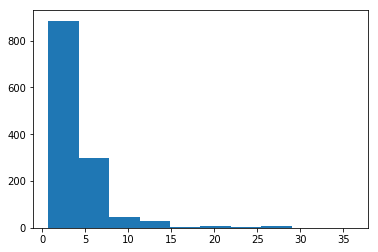

In [39]:
#------exploratory analysis-----------
#plot of MI
plt.hist(tag_MI['MI'])
plt.show()

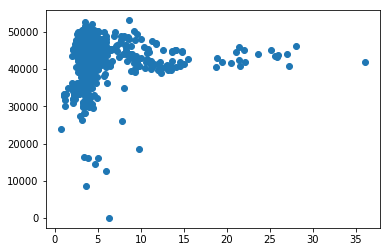

In [40]:
#scatter plot of some variables against MI
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70104'])
plt.show()

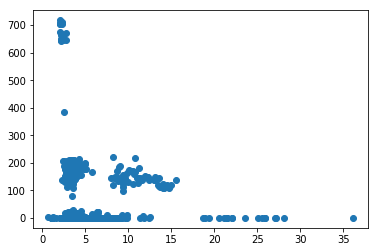

In [41]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70113'])
plt.show()

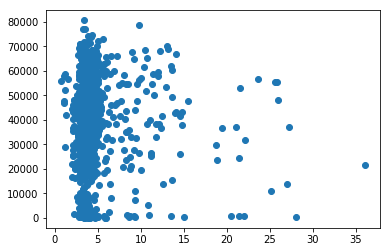

In [42]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70116'])
plt.show()

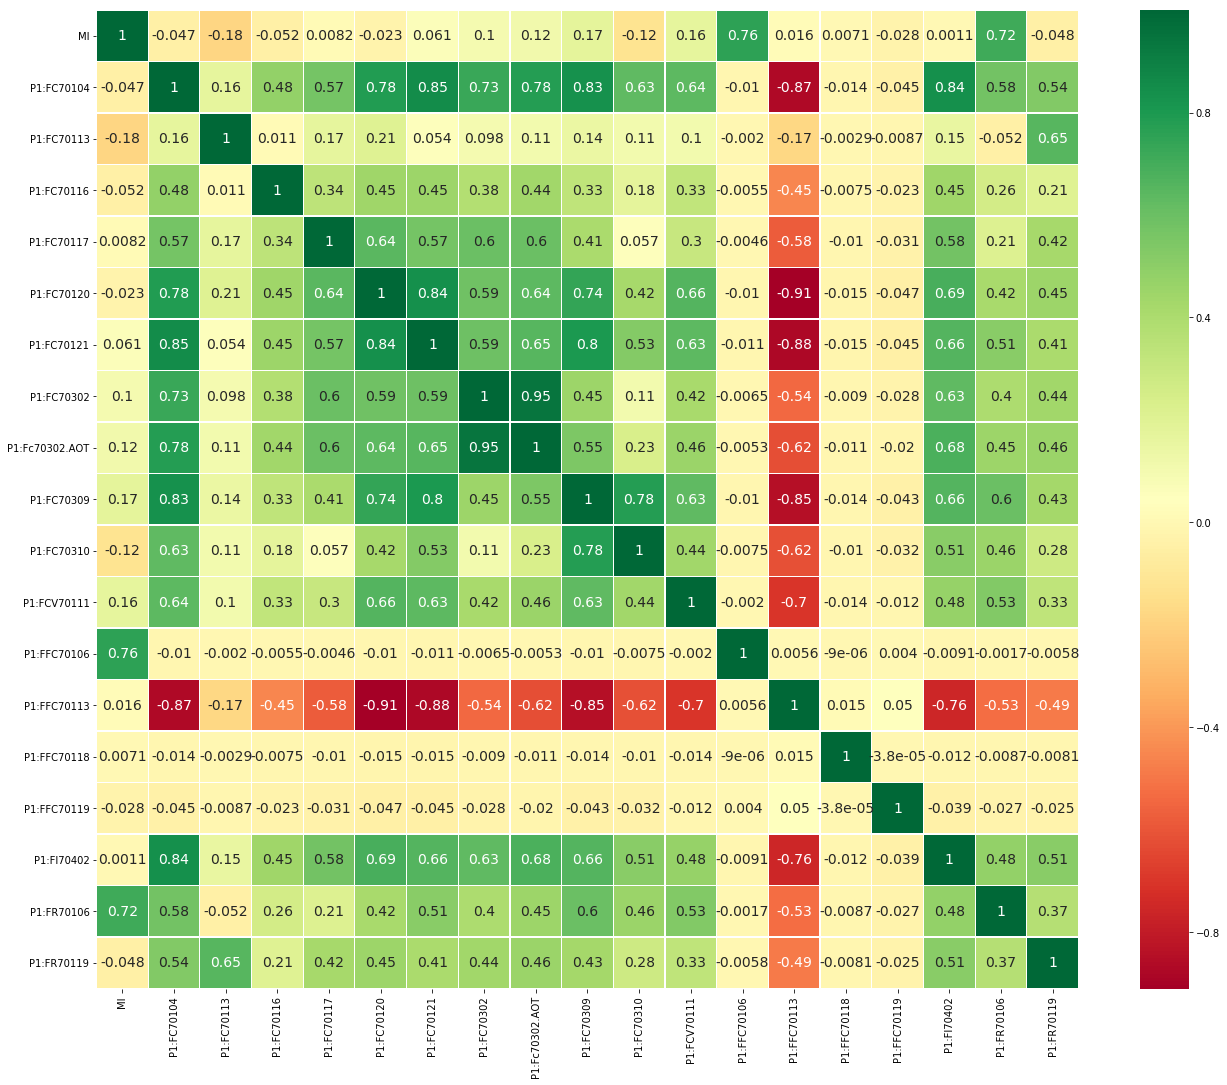

In [43]:
#heat map column 2 to 21
tag_cor1 = tag.iloc[:,2:21]
sns.heatmap(tag_cor1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

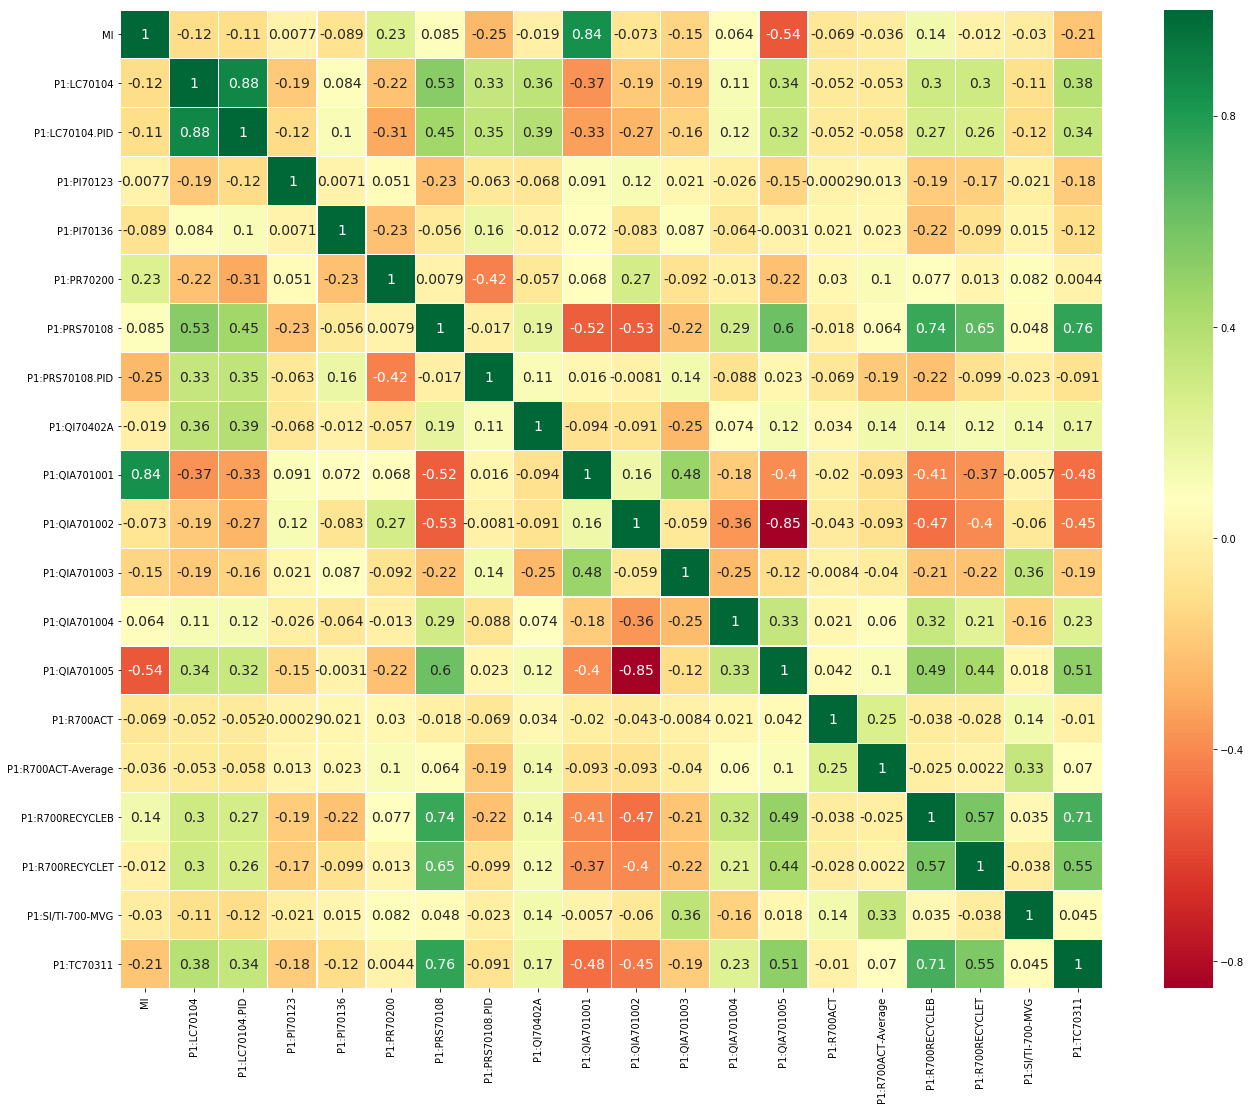

In [44]:
#heat map column 22 to 41
tag_cor2 = tag.iloc[:,np.r_[2, 22:41]]
sns.heatmap(tag_cor2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

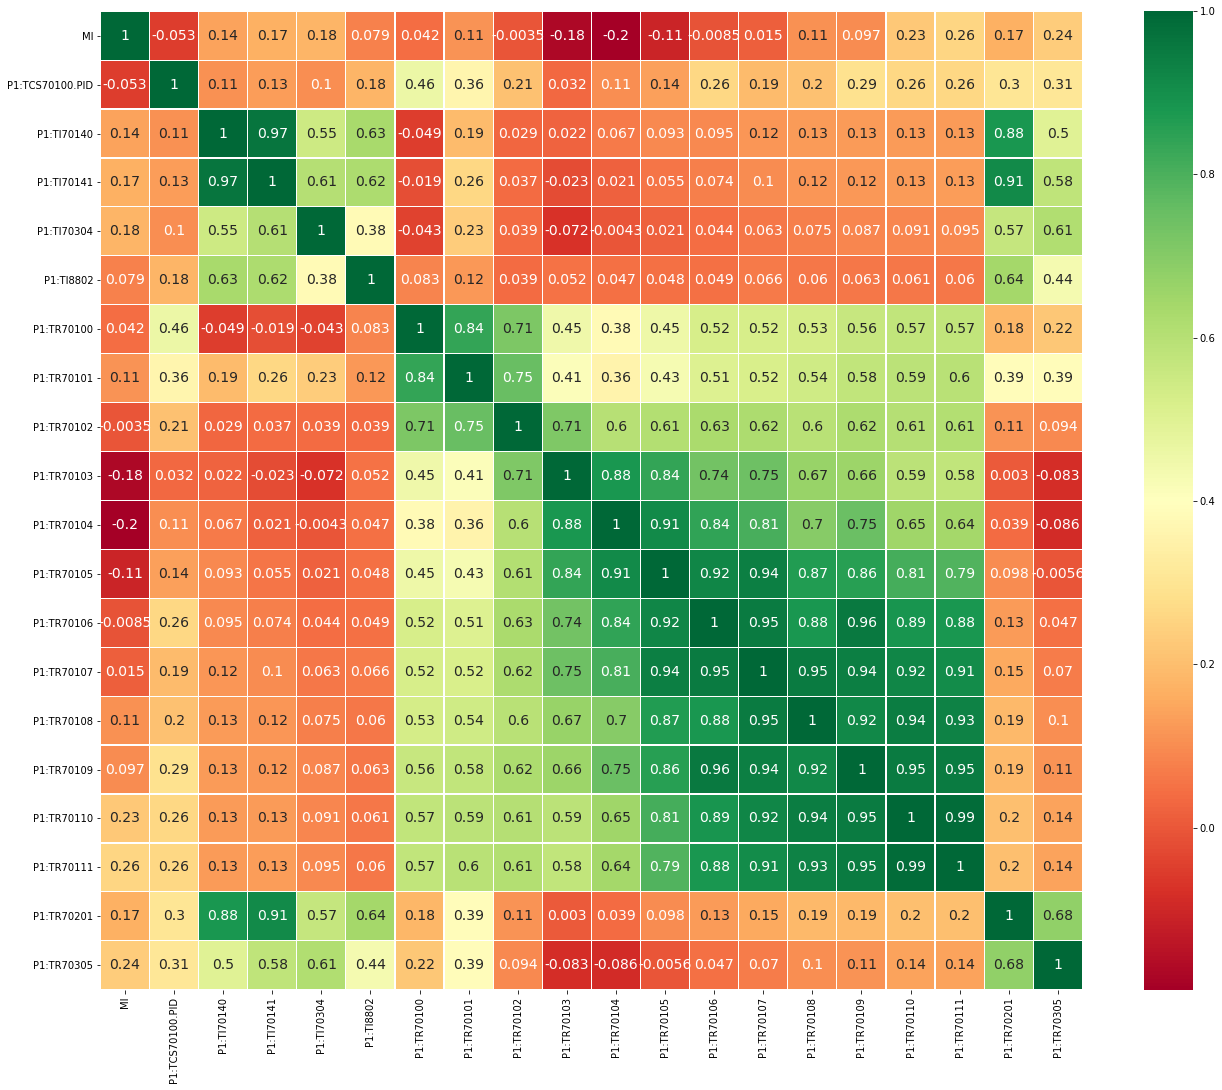

In [45]:
#heat map column 42 to 61
tag_cor3 = tag.iloc[:,np.r_[2, 42:61]]
sns.heatmap(tag_cor3.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

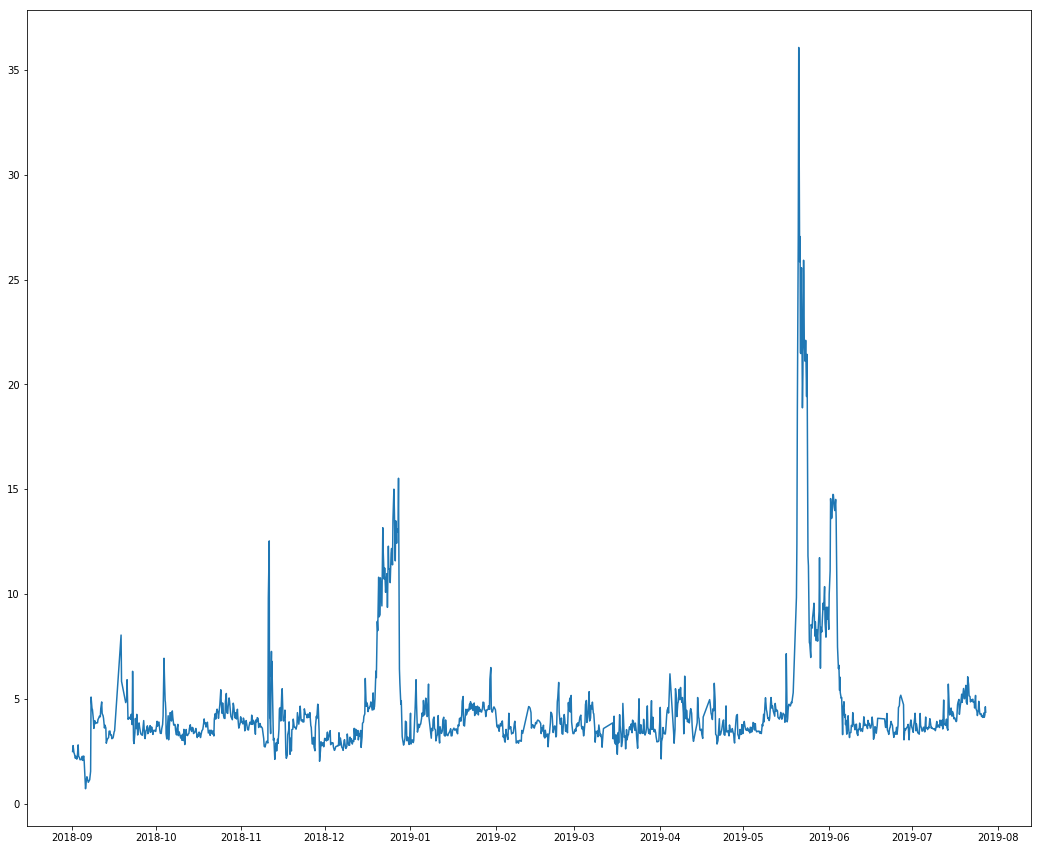

In [89]:
#time series plot of MI value
time = tag_MI['Time']
mi = tag_MI['MI']
plt.plot(time,mi)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.show()

In [62]:
#check what is going on at the spike
tag_MI.loc[(tag_MI['Time'] >= '2019-05-19') & (tag_MI['Time'] <= '2019-06-10')] #it seems like spike occurs in late May

,Time,ProGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
372954,2019-05-19 01:15:00,1102KR,5.13,45133.059,0.750000,51401.82000,20289.336,6901.6660,8080.6499,94796.82000,...,165.20303,172.01248,179.33630,182.67892,186.78061,185.41711,189.84369,188.43825,111.31921,116.45943
373194,2019-05-19 05:15:00,1102KR,5.29,45221.402,0.750000,48983.76200,19708.393,7098.1514,7884.8628,90601.14800,...,162.36447,169.06781,183.25114,182.36115,183.20670,182.10234,185.49506,183.42073,111.88939,117.08979
374875,2019-05-20 09:16:00,4100P,9.84,18470.016,0.750000,78503.60200,11927.534,7972.3247,6178.2915,534.80322,...,211.29727,200.93590,214.70654,206.47649,198.59970,215.78658,203.01640,208.62534,104.00912,110.44680
375114,2019-05-20 13:15:00,4100P,12.38,38986.461,0.750000,36495.63700,11592.108,8010.5513,7443.8438,86104.20300,...,168.88611,190.73180,203.29384,199.93735,193.90063,206.64522,200.65405,202.20345,108.68261,112.25220
375354,2019-05-20 17:15:00,4100P,18.71,40572.223,0.750000,29701.93200,11824.894,8048.9380,7795.7739,87559.41400,...,167.44279,184.76541,187.42430,187.09775,191.56570,190.34700,196.92006,197.04973,110.00189,113.80434
375834,2019-05-21 01:15:00,4100T,27.22,40826.922,0.750000,37236.72700,19728.189,8125.7114,7295.1016,95128.41400,...,176.34206,180.77524,188.41653,186.75945,183.28595,190.75356,192.99265,193.72975,110.89773,108.71613
376074,2019-05-21 05:15:00,4100T,36.07,42034.453,0.750000,21587.68800,19724.592,8135.1855,7866.7852,95177.57800,...,168.16827,182.75571,184.82690,186.21626,189.05544,187.49532,195.75021,195.90526,111.34564,109.14731
376434,2019-05-21 11:15:00,4100T,28.05,46135.211,0.750000,597.45319,19802.291,7858.2178,7748.4551,104402.95000,...,178.53357,183.93481,196.03682,189.43808,182.78752,201.71239,196.97533,198.60699,112.01752,107.93250
376554,2019-05-21 13:15:00,4100T,25.85,43259.191,0.750000,55443.91400,19849.865,7024.3916,7121.6865,113442.41000,...,167.94078,178.50237,183.60046,178.66434,184.55937,186.27606,187.25969,188.92244,112.24148,104.30679
376794,2019-05-21 17:15:00,4100T,27.05,44111.988,0.750000,14006.43200,19696.768,7863.0410,7198.0029,95646.96100,...,167.91492,179.03226,185.96135,183.39999,182.27669,191.25432,193.89822,192.19931,112.23965,110.18961


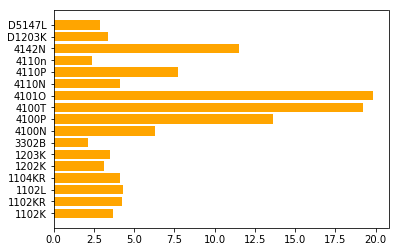

In [88]:
#MI mean value by different progrades
Prograde_MI = tag_MI.groupby(['ProGrade']).mean() #check mean MI for each Prograde
plt.barh(Prograde_MI.index, Prograde_MI['MI'], color = 'orange')
plt.show()

In [111]:
#--------test modeling-----------

#split train and test
train, test = train_test_split(tag_MI, test_size=0.3, random_state=42)


In [112]:
np.shape(train)

(894, 61)

In [113]:

#pre-processing, use all numeric predicators
X_train = train.drop(["Time", "ProGrade", "MI"],axis=1)
Y_train = train["MI"]

In [114]:
#fit linear model
lm_model = LinearRegression().fit(X_train, Y_train)

In [115]:
#check accuracy
lm_model.score(X_train, Y_train) #check r squared value

0.26096320911303272